# **1. DEFINING THE RESEARCH QUESTION**

# Overview

Spam emails can be annoying and fill up email inboxes with messages that can contain irrelevant marketing material, fake news and unsavory content.
Individuals have the option to mark emails as spam, which gives data on what the content of spam emails is and the content that personal, non-spam emails contain. This data can be used to create generalised spam filters that can identify characteristics of spam emails and flag them so that the user does not see them in their inbox.
These filters must have a high enough prediction accuracy to avoid misclassifying personal mail as spam, but not to let too many spam emails into the inbox.

# a. Specifying the Research Question

Use the Naives Bayes algorithm to predict the chances of an email being a spam or a non-spam email.

# b. Defining the Metric for Success

Our model would be considered a success if it is able to compute an accuracy score of at least 80%.

# c. Understanding the context

This dataset is from UCI machine learning repository, and we're going to use it to classiy whether an email is spam or not. Source:

Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt 

Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304

Donor: George Forman (gforman at nospam hpl.hp.com) 650-857-7835

Generated: June-July 1999

It has previously been used for determining whether an email is spam or not, which means that this data is relevant and sufficient for this analysis.

Data description: The first 54 features (continuous, real [0,100] indicate the percent of words in an email matching a particular word (any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string) or character.
The run-length attributes (55-57) measure the length of sequences of consecutive capital letters (continuous real/integer [1,...].
The last attribute (nominal {0,1} class) denotes whether the e-mail was considered spam (1) or not (0).

The data provided is a csv file with two accompanying text documentation files.

# d. Recording the Experimental Design



1.   Prepare dataset(s) and clean them
2.  Carry out EDA
3.   Carry out modelling using Naive Bayes
4.  Optimize the Naive Bayes models
5.   Challenge the Solution
6.   Document everything.





# **2. DATA PREPARATION, UNDERSTANDING AND CLEANING**

In [20]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [21]:
# loading basic Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Define the column names
spam_columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your',
'word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george',
'word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data',
'word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(',
'char_freq_[','char_freq_exclamation','char_freq_dollar','char_freq_hashtag','capital_run_length_average',
'capital_run_length_longest','capital_run_length_total','spam']
# 
df=pd.read_csv("spambase.data", names=spam_columns)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [23]:
# preview the shape of the dataset
print("The number of records in the spambase dataset is: "+ str(df.shape))

The number of records in the spambase dataset is: (4601, 58)


In [24]:
# let's check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

We can see that this dataset has floating point values apart from the last three columns which are of type integer. We also see that there are no missing values so there's no need to perform any cleaning.

In [25]:
# Checking for Anomalies
#Means checking for duplicates in the dataset
# 
print(df.duplicated().any())

# If any, print the sum of duplicates
print(df.duplicated().sum())

True
391


This means that there are 391 duplicates in the dataset

In [26]:
# Dealing with duplicates

df.drop_duplicates(keep='first', inplace = True)

print(df.duplicated().any())

# Duplicates have been removed

False


The 391 duplicates have been removed

In [27]:
# Checking if there are Missing Data
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

The output displays that there are no missing values, hence we proceed to Exploratory data analysis

In [28]:
# setting the 'spam' column as type category
data = df.astype({'spam' : 'category'})

# confirming the data type has been changed
data.spam.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

# **3. EXPLORATORY DATA ANALYSIS**

In [29]:
# previewing the statistical characteristics of the dataset
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


0    2531
1    1679
Name: spam, dtype: int64


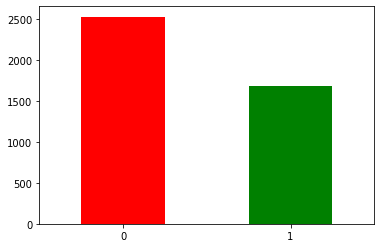

In [30]:
# checking how many are spam and how many are not
data.spam.value_counts().plot(kind = 'bar', rot = 0, color = ['red', 'green'])
print(data.spam.value_counts())

Messages that are not marked as spam are 2,531 while those that are marked as spam are 1,679. This means that not spam are more than the spam messages

In [31]:
# selecting random variables to view their distributions since there are too many variables
# to do them all
import random
dist = random.sample(spam_columns, k = 9)
dist

['char_freq_exclamation',
 'word_freq_business',
 'word_freq_table',
 'word_freq_meeting',
 'word_freq_report',
 'word_freq_hpl',
 'word_freq_people',
 'word_freq_lab',
 'word_freq_direct']

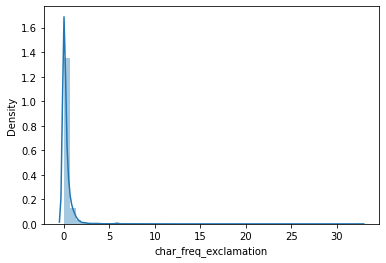

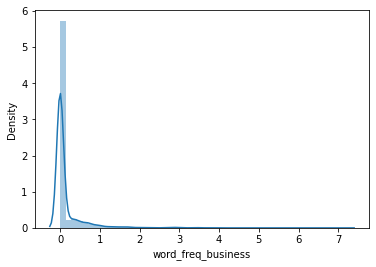

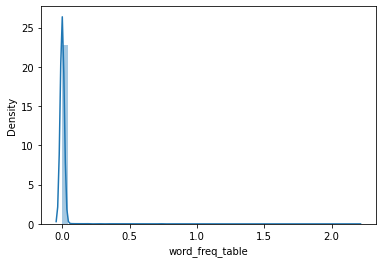

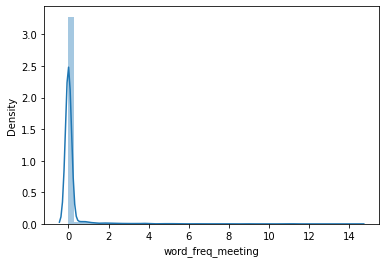

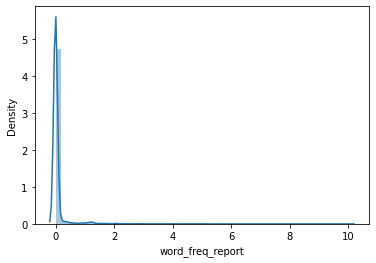

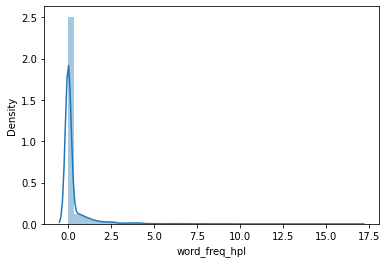

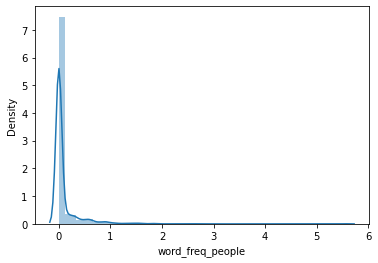

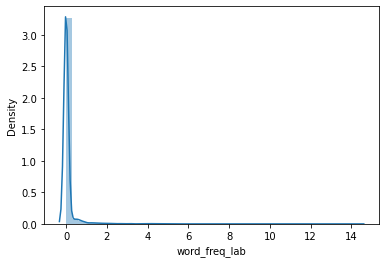

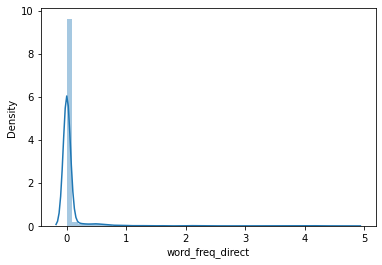

In [32]:
for item in dist:
    sns.distplot(data[item])
    plt.show()

From the output, it appears that all the variables are positively skewed.

Therefore, we cannot use Multinomial Naive Bayes classifier with this dataset because it requires that our features' data should be discrete and nominal, which they clearly are not. 

Similarly, We cannot use Bernoulli NB because it requires that all the features in in our dataset should have binary values, which, clearly isn't the case.

So we are left with Gaussian Naive Bayes, which we will use for our model.

# **4. MODELING**

# Implementing the Solution

Create a baseline model which will be used for comparison between the different model classifiers. We shall use logistic Regression model as our baseline model

# a. Logistic Regression Model

In [34]:
# x is the independent variable
# y is the target variable(price)
# 
X = data.drop(columns = ['spam'], axis=1)
y = data['spam']
# 
# Splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
# 
# Standardising the X_train and the X_test to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Training the model
# 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# 
# Fitting the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
# 
# Making predictions using the model above
# 
preds = logmodel.predict(X_test)
# 
# Getting the accuracy of our model
from sklearn.metrics import accuracy_score, r2_score,mean_absolute_error, mean_squared_error
import scipy.stats as stats
print("Logistic Regression model accuracy is", accuracy_score(y_test,preds))
 

Logistic Regression model accuracy is 0.9251781472684085


Our baseline model accuracy is 92.5% which means that our model does good predictions

# b. Gaussian Naives Bayes Classifier

## Without splitting

In [36]:
# instantiating our classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# fitting to our data
model = gnb.fit(X, y)

# making predictions
y_pred = model.predict(X)

# evaluating the algorithm
from sklearn.metrics import accuracy_score
print("The accuracy is:", accuracy_score(y, y_pred))

The accuracy is: 0.828978622327791


The accuracy score of Naives Bayes model is 82.8% without splitting the data

With train-test splits

In [38]:
my_tests = [0.1, 0.2, 0.3, 0.4, 0.5]

from sklearn.model_selection import train_test_split as tts

for test in my_tests:
    X_train, X_test, y_train, y_test = tts(X, y, test_size = test, random_state = 12)
    
    # fitting to classifier
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    
    # making predictions
    y_pred = clf.predict(X_test)

    # evaluating the algorithm
    print("The test size {} has accuracy score:".format(test), accuracy_score(y_test, y_pred))

The test size 0.1 has accuracy score: 0.833729216152019
The test size 0.2 has accuracy score: 0.8420427553444181
The test size 0.3 has accuracy score: 0.833729216152019
The test size 0.4 has accuracy score: 0.834916864608076
The test size 0.5 has accuracy score: 0.833729216152019


From the output, we can see that an 80-20 split yields the highest accuracy score (84.2%)

# **5. CHALLENGING THE SOLUTION**

# Normalizing

Without splitting

In [39]:
# splitting our dataset into predictior and target variables
X = data.drop(columns = ['spam']).values
y = data['spam'].values
print(X.shape)
print(y.shape)

(4210, 57)
(4210,)


In [40]:
# normalizing
from sklearn.preprocessing import Normalizer
normal = Normalizer()
X = normal.fit_transform(X)

In [41]:
# instantiating classifier again
gnb = GaussianNB()

# fitting to data
model = gnb.fit(X, y)

# making predictions
y_pred = model.predict(X)

# evaluating the algorithm
print("The Accuracy is:", accuracy_score(y, y_pred))

The Accuracy is: 0.7717339667458433


The accuracy score went down after normalizing which is weird

Normalizing with splitting

In [42]:
for test in my_tests:
    X_train, X_test, y_train, y_test = tts(X, y, test_size = test, random_state = 12)
    
    # normalizing
    normal = Normalizer()
    X_train = normal.fit_transform(X_train)
    X_test = normal.transform(X_test)

    # fitting to classifier
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    
    # making predictions
    y_pred = clf.predict(X_test)

    # evaluating the algorithm
    print("Test size {} has accuracy score:".format(test), accuracy_score(y_test, y_pred))

Test size 0.1 has accuracy score: 0.7672209026128266
Test size 0.2 has accuracy score: 0.7743467933491687
Test size 0.3 has accuracy score: 0.7640538400633412
Test size 0.4 has accuracy score: 0.7719714964370546
Test size 0.5 has accuracy score: 0.7885985748218527


As with when we didn't split the features and label into training and test sets, all the accuracy scores for the different test sizes went down after normalizing. The 80-20 split still remains the most accurate one, though.

It is clear that normalizing this dataset is not the best way to optimize our model. We will try a different method, this time removing highly correlated variables.

# Checking for Multicollinearity and removing multicollinear variables

In [45]:
# checking for multicollinearity
corr = data.corr()


In [46]:
# Calculating VIF scores
vif =pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)
vif

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.101307,-0.004149,-0.015513,-0.000943,0.009130,-0.012852,0.035940,0.049783,-0.061157,-0.005142,...,0.005559,0.009466,-0.008444,0.021595,-0.017671,-0.015744,0.007463,-0.031333,0.009252,-0.038375
word_freq_address,-0.004149,1.107902,0.003449,0.015624,-0.011665,0.015299,-0.039440,0.014547,-0.006352,-0.189365,...,0.013124,-0.028008,0.044817,0.017210,-0.005564,-0.017674,-0.028109,0.001289,-0.037954,-0.005508
word_freq_all,-0.015513,0.003449,1.094293,0.023958,-0.019600,-0.020634,0.024997,0.028332,-0.023654,0.023129,...,0.017771,0.009822,-0.009426,0.012886,-0.065861,0.002405,0.006386,-0.090984,-0.009322,-0.007165
word_freq_3d,-0.000943,0.015624,0.023958,1.006484,0.000997,0.015990,-0.012409,-0.003809,0.008478,0.001780,...,0.002550,0.015126,0.027071,0.007353,0.005285,-0.002557,0.008443,0.011907,-0.036225,-0.010699
word_freq_our,0.009130,-0.011665,-0.019600,0.000997,1.111598,-0.014713,-0.088868,0.023079,0.039620,0.002755,...,0.024766,0.010942,0.033274,0.003186,0.019770,0.001228,0.001452,-0.039854,-0.032368,0.036212
word_freq_over,-0.012852,0.015299,-0.020634,0.015990,-0.014713,1.077876,-0.009233,-0.048201,-0.043134,0.039818,...,0.019476,0.015642,-0.007835,0.001336,-0.028256,-0.021170,-0.015931,0.051580,-0.040025,0.007355
word_freq_remove,0.035940,-0.039440,0.024997,-0.012409,-0.088868,-0.009233,1.131372,0.046799,0.008385,-0.006648,...,0.018063,0.021752,0.047856,0.007476,-0.004047,-0.029279,-0.047342,-0.006114,-0.065981,0.085004
word_freq_internet,0.049783,0.014547,0.028332,-0.003809,0.023079,-0.048201,0.046799,1.107345,-0.034847,-0.040656,...,0.010208,0.010834,0.027397,0.016420,0.000381,0.004710,0.005371,0.013441,-0.012553,0.013031
word_freq_order,-0.061157,-0.006352,-0.023654,0.008478,0.039620,-0.043134,0.008385,-0.034847,1.194533,-0.054906,...,0.014439,-0.010247,0.073721,-0.036724,0.003486,-0.079824,0.002630,-0.059572,-0.023378,-0.182183
word_freq_mail,-0.005142,-0.189365,0.023129,0.001780,0.002755,0.039818,-0.006648,-0.040656,-0.054906,1.121963,...,0.006751,-0.016232,0.006151,-0.019175,-0.007097,-0.014348,-0.032002,-0.048818,-0.024510,-0.007861


In [47]:
# Identifying features with VIF over 5
vif[vif>5].sum()

word_freq_make                  0.000000
word_freq_address               0.000000
word_freq_all                   0.000000
word_freq_3d                    0.000000
word_freq_our                   0.000000
word_freq_over                  0.000000
word_freq_remove                0.000000
word_freq_internet              0.000000
word_freq_order                 0.000000
word_freq_mail                  0.000000
word_freq_receive               0.000000
word_freq_will                  0.000000
word_freq_people                0.000000
word_freq_report                0.000000
word_freq_addresses             0.000000
word_freq_free                  0.000000
word_freq_business              0.000000
word_freq_email                 0.000000
word_freq_you                   0.000000
word_freq_credit                0.000000
word_freq_your                  0.000000
word_freq_font                  0.000000
word_freq_000                   0.000000
word_freq_money                 0.000000
word_freq_hp    

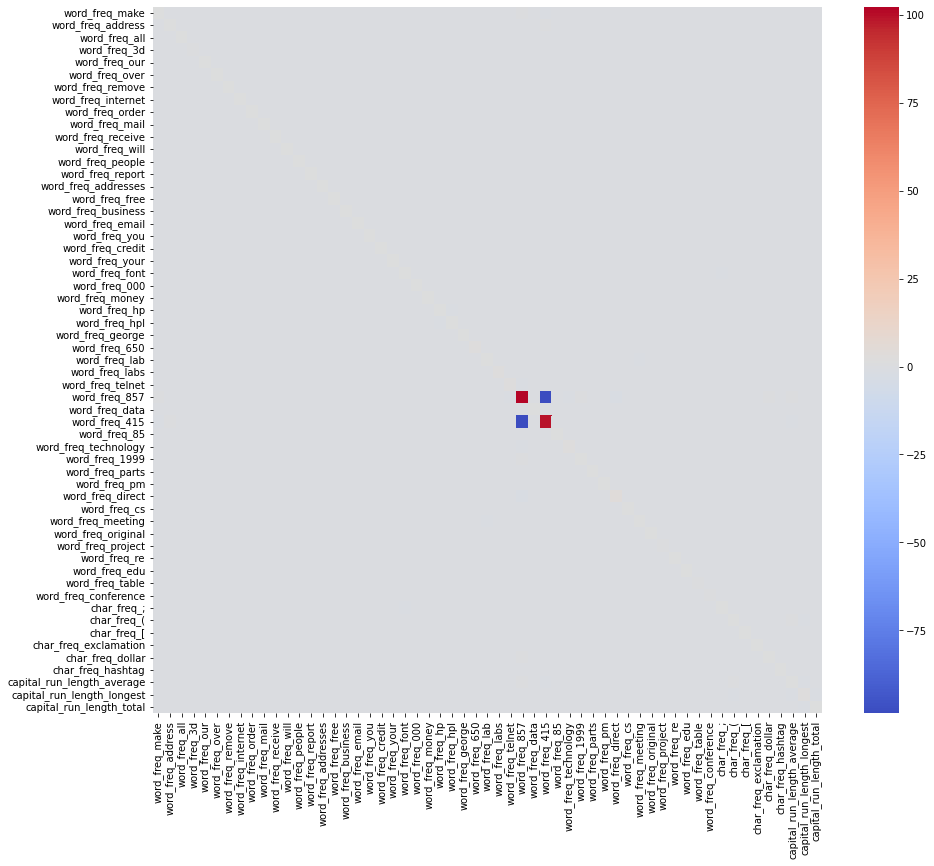

In [48]:
# Plotting VIF scores
f, ax = plt.subplots(figsize=(15, 13))
sns.heatmap(vif, cmap = 'coolwarm',
            xticklabels=vif.columns.values,
            yticklabels=vif.columns.values)

Anything that has a VIF score of 5 and above is bound to create problems for our models because of its high multicollinearity. It's hard to see clearly which variable is highly correlated with which, but we can somehow make out that 'word_freq_857' and 'word_freq_415' seem to have ultra high correlation. Let's remove them and see if our VIF scores improve.

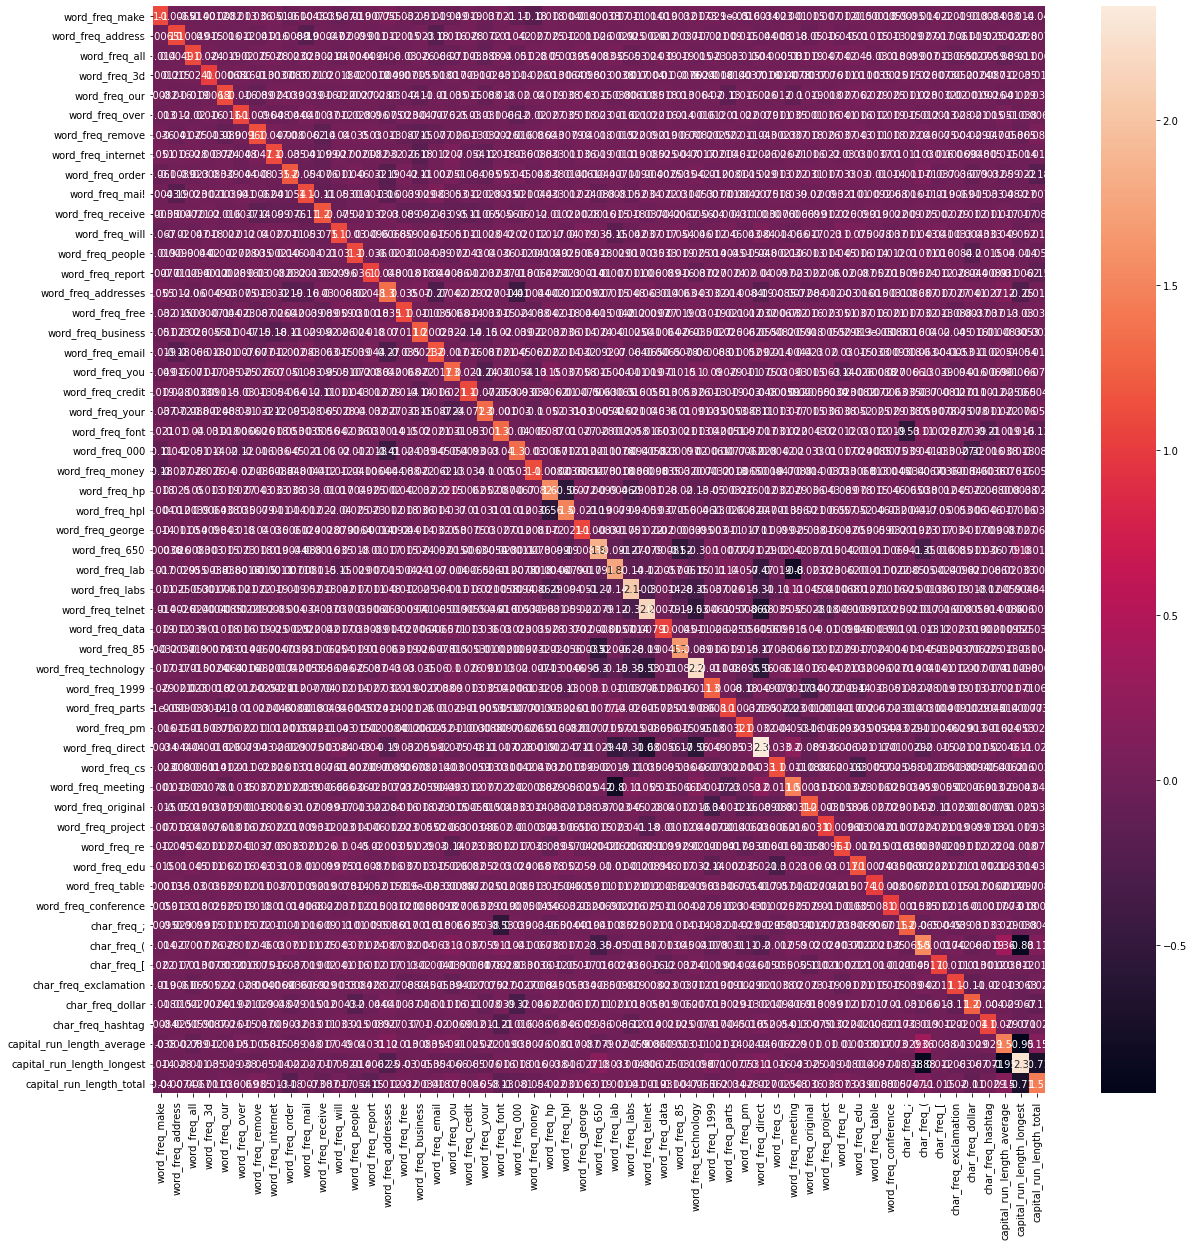

In [49]:
data2 = data.drop(columns = ['word_freq_857', 'word_freq_415'])

corr2 = data2.corr()
vif2 = pd.DataFrame(np.linalg.inv(corr2.values), index = corr2.index, columns = corr2.columns)

# using a heatmap to display the results
plt.figure(figsize = (20, 20))
sns.heatmap(vif2, annot = True)

We can see that our dataset has been greatly improved now that the highly correlated variables have been removed.Let's see how our Gaussian Naive Bayes Classifier will perform now.

Gaussian NB without splitting after removing highly correlated variables

In [50]:
# splitting our dataset into predictior and target variables
X2 = data2.drop(columns = ['spam']).values
y2 = data2['spam'].values
print(X2.shape)
print(y2.shape)

(4210, 55)
(4210,)


In [52]:
# instantiating our classifier
gnb2 = GaussianNB()

# fitting to our data
model2 = gnb2.fit(X2, y2)

# making predictions
y_pred2 = model2.predict(X2)

# evaluating the algorithm
print("The Accuracy is:", accuracy_score(y2, y_pred2))

The Accuracy is: 0.8353919239904988


There is a slight improvement in our accuracy score from 82.8% to 83.5%

Gaussian NB with splitting after removing highly correlated variables

In [54]:
for test in my_tests:
    X_train2, X_test2, y_train2, y_test2 = tts(X2, y2, test_size = test, random_state = 12)
    
    # fitting to classifier
    clf2 = GaussianNB()
    clf2.fit(X_train2, y_train2)
    
    # making predictions
    y_pred2 = clf2.predict(X_test2)

    # evaluating the algorithm
    print("The test size {} has accuracy score:".format(test), accuracy_score(y_test2, y_pred2))

The test size 0.1 has accuracy score: 0.8432304038004751
The test size 0.2 has accuracy score: 0.8467933491686461
The test size 0.3 has accuracy score: 0.838479809976247
The test size 0.4 has accuracy score: 0.8426365795724465
The test size 0.5 has accuracy score: 0.8413301662707838


We see that the accuracy scores of all our test sizes have improved and, as expected, the 80-20 split is the most accurate one with a score of 84.6% which is a very slight improvement from the 84.2% one.

# **EVALUATING THE MODEL**

According to the metric for success, the model is considered accurate enough for use as it attained above 80% prediction accuracy